In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Assuming 'your_dataset.csv' is the name of your dataset file
file_path ='/content/drive/MyDrive/Dataset/output_file.csv'

# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# Count occurrences of labels
tcp_count = df[df['Label'] == 'TCP'].shape[0]
udp_count = df[df['Label'] == 'UDP'].shape[0]
benign_count = df[df['Label'] == 'BENIGN'].shape[0]

# Display the counts
print('TCP Count:', tcp_count)
print('UDP Count:', udp_count)
print('BENIGN Count:', benign_count)


TCP Count: 235479
UDP Count: 13048
BENIGN Count: 434


<ipython-input-3-52e72a6f2206>:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [ ]:
# Load your dataset (replace 'concatenated_data.csv' with your actual dataset file)
df = pd.read_csv('/content/drive/MyDrive/Dataset/output_file.csv')

<ipython-input-4-6b373fe72a44>:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Dataset/output_file.csv')


In [ ]:
df.head(5)

,Unnamed: 0,Time,Source_ip,Destination_IP,Source_Port,Destination_Port,SYN,ACK,RST,Label
0,0,0.0,10.50.197.71,10.50.192.199,49543.0,443.0,Not set,Set,Not set,TCP
1,1,0.000002,10.50.192.199,10.50.197.71,443.0,49543.0,Not set,Set,Not set,TCP
2,2,0.00004,10.50.197.71,10.50.192.199,49543.0,443.0,Not set,Set,Not set,TCP
3,3,0.000042,10.50.192.199,10.50.197.71,443.0,49543.0,Not set,Set,Not set,TCP
4,4,0.000053,10.50.197.71,10.50.192.199,49543.0,443.0,Not set,Set,Not set,TCP


In [ ]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import seaborn as sns
from pandas import DataFrame

In [ ]:
df.shape

(261254, 10)

In [ ]:
df.dtypes

Unnamed: 0            int64
Time                 object
Source_ip            object
Destination_IP       object
Source_Port         float64
Destination_Port    float64
SYN                  object
ACK                  object
RST                  object
Label                object
dtype: object

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

# Assuming df['SYN'], df['ACK'], df['RST'], df['Label'], df['Time'] may have mixed types
df['SYN'] = df['SYN'].astype(str)
df['ACK'] = df['ACK'].astype(str)
df['RST'] = df['RST'].astype(str)
df['Label'] = df['Label'].astype(str)
df['Time'] = df['Time'].astype(str)
df['Source_ip'] = df['Source_ip'].astype(str)
df['Destination_IP'] = df['Destination_IP'].astype(str)
df['Source_Port'] = df['Source_Port'].astype(str)
df['Destination_Port'] = df['Destination_Port'].astype(str)

# Now apply LabelEncoder
df['SYN'] = le.fit_transform(df['SYN'])
df['ACK'] = le.fit_transform(df['ACK'])
df['RST'] = le.fit_transform(df['RST'])
df['Label'] = le.fit_transform(df['Label'])
df['Time'] = le.fit_transform(df['Time'])
df['Source_ip'] = le.fit_transform(df['Source_ip'])
df['Destination_IP'] = le.fit_transform(df['Destination_IP'])
df['Source_Port'] = le.fit_transform(df['Source_Port'])
df['Destination_Port'] = le.fit_transform(df['Destination_Port'])

In [ ]:
df.dtypes

Unnamed: 0          int64
Time                int64
Source_ip           int64
Destination_IP      int64
Source_Port         int64
Destination_Port    int64
SYN                 int64
ACK                 int64
RST                 int64
Label               int64
dtype: object

In [ ]:
df['Label'].value_counts()

12    235479
13     13048
5       3823
2       1579
4       1579
11      1577
3       1574
1       1212
14       589
0        434
15       245
6         69
8         21
9         16
10         6
7          3
Name: Label, dtype: int64

In [ ]:
# Define a list of labels for 'TCP', 'UDP', and 'BENIGN'
selected_labels = [12, 13, 0]

# Filter the dataframe to include only selected labels
filtered_df = df[df['Label'].isin(selected_labels)]

# Display the value counts
label_counts = filtered_df['Label'].value_counts()
print(label_counts)


12    235479
13     13048
0        434
Name: Label, dtype: int64


**Balancing using SMOTE**

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


# Filter the dataframe to include only selected labels
filtered_df = df[df['Label'].isin(selected_labels)]

# Separate features and labels
X = filtered_df.drop('Label', axis=1)  # Assuming 'Label' is the target column
y = filtered_df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nLabel Counts After SMOTE:")
print(pd.Series(y_train_resampled).value_counts())



Label Counts After SMOTE:
12    188417
13    188417
0     188417
Name: Label, dtype: int64


**Balancing using RandomOverSampler**

In [ ]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Filter the dataframe to include only selected labels
filtered_df = df[df['Label'].isin(selected_labels)]

# Separate features and labels
X = filtered_df.drop('Label', axis=1)  # Assuming 'Label' is the target column
y = filtered_df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply random oversampling to balance the training set
random_oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = random_oversampler.fit_resample(X_train, y_train)

print("\nLabel Counts After Random Oversampling:")
print(pd.Series(y_train_resampled).value_counts())



Label Counts After Random Oversampling:
12    188417
13    188417
0     188417
Name: Label, dtype: int64


**Preprocessing Part**

In [ ]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

X = df.loc[:, ~df.columns.isin(['Label'])]
y = df.loc[:, df.columns.isin(['Label'])]

y_df = df['Label'].values
y_df

df.shape

missing_df = pd.DataFrame(df.isnull().sum())
missing_df

df= pd.DataFrame(df.fillna(0))
df.head(5)

df.isnull().sum()

X= df.loc[:, ~df.columns.isin(['Label','Time','Source_ip','Destination_IP','Source_Port','Destination_Port','SYN','ACK','RST',])]
y = df['Label'].values

X_test= df.loc[:, ~df.columns.isin(['Label','Time','Source_ip','Destination_IP','Source_Port','Destination_Port','SYN','ACK','RST'])]
y_test = df['Label'].values

**Decission Tree**

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'X' is your Pandas DataFrame and 'y' is your label vector
# Replace X and y with your actual data
# Example data:
# X = your_dataframe
# y = your_label_vector


# Filter the dataset for the selected labels
filtered_indices = [i for i in range(len(y)) if y[i] in selected_labels]

X_selected = X.iloc[filtered_indices]
y_selected = y[filtered_indices]

# Split the filtered data into training and testing sets
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    X_selected, y_selected, test_size=0.2, random_state=42
)

# Create a decision tree classifier
clf_selected = DecisionTreeClassifier()

# Train the classifier on the selected labels
clf_selected.fit(X_train_selected, y_train_selected)

# Make predictions on the test set
predictions_selected = clf_selected.predict(X_test_selected)

# Evaluate the model for the selected labels
accuracy_selected = accuracy_score(y_test_selected, predictions_selected)
print(f"Accuracy for selected labels: {accuracy_selected}")

# Display classification report for the selected labels
print("Classification Report for selected labels:")
print(classification_report(y_test_selected, predictions_selected))

# Display confusion matrix for the selected labels
conf_matrix_selected = confusion_matrix(y_test_selected, predictions_selected)
print("Confusion Matrix for selected labels:")
print(conf_matrix_selected)


Accuracy for selected labels: 0.9112325025606008
Classification Report for selected labels:
              precision    recall  f1-score   support

           0       0.07      0.11      0.09        74
          12       0.95      0.95      0.95     47062
          13       0.19      0.19      0.19      2657

    accuracy                           0.91     49793
   macro avg       0.40      0.42      0.41     49793
weighted avg       0.91      0.91      0.91     49793

Confusion Matrix for selected labels:
[[    8    65     1]
 [  105 44869  2088]
 [    1  2160   496]]


**Navie Bayes Classifier**

Accuracy for selected labels: 0.9451529331432129
Classification Report for selected labels:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        74
          12       0.95      1.00      0.97     47062
          13       0.00      0.00      0.00      2657

    accuracy                           0.95     49793
   macro avg       0.32      0.33      0.32     49793
weighted avg       0.89      0.95      0.92     49793



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


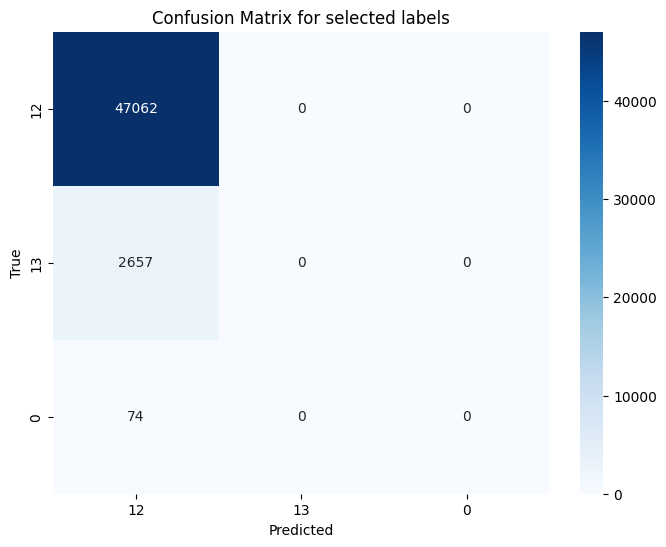

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'X' is your Pandas DataFrame and 'y' is your label vector
# Replace X and y with your actual data
# Example data:
# X = your_dataframe
# y = your_label_vector

# Filter the dataset for the selected labels
filtered_indices = [i for i in range(len(y)) if y[i] in selected_labels]

X_selected = X.iloc[filtered_indices]
y_selected = y[filtered_indices]

# Split the filtered data into training and testing sets
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    X_selected, y_selected, test_size=0.2, random_state=42
)

# Create a Naive Bayes classifier (MultinomialNB)
clf_selected = MultinomialNB()

# Train the classifier on the selected labels
clf_selected.fit(X_train_selected, y_train_selected)

# Make predictions on the test set
predictions_selected = clf_selected.predict(X_test_selected)

# Evaluate the model for the selected labels
accuracy_selected = accuracy_score(y_test_selected, predictions_selected)
print(f"Accuracy for selected labels: {accuracy_selected}")

# Display classification report for the selected labels
print("Classification Report for selected labels:")
print(classification_report(y_test_selected, predictions_selected))

# Display confusion matrix for the selected labels
cm = confusion_matrix(y_test_selected, predictions_selected, labels=selected_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=selected_labels, yticklabels=selected_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for selected labels')
plt.show()


In [ ]:
pip install tensorflow


CNN

Training on Fold: 1
Epoch 1/10
5187/5187 [==============================] - 30s 5ms/step - loss: 0.0037 - accuracy: 0.9994 - val_loss: 1.0682e-04 - val_accuracy: 1.0000
Epoch 2/10
5187/5187 [==============================] - 17s 3ms/step - loss: 1.6126e-04 - accuracy: 1.0000 - val_loss: 1.2859e-05 - val_accuracy: 1.0000
Epoch 3/10
5187/5187 [==============================] - 17s 3ms/step - loss: 2.4705e-04 - accuracy: 1.0000 - val_loss: 3.3727e-07 - val_accuracy: 1.0000
Epoch 4/10
5187/5187 [==============================] - 16s 3ms/step - loss: 7.3063e-05 - accuracy: 1.0000 - val_loss: 3.4356e-04 - val_accuracy: 0.9999
Epoch 5/10
5187/5187 [==============================] - 18s 3ms/step - loss: 1.7619e-04 - accuracy: 1.0000 - val_loss: 1.7661e-05 - val_accuracy: 1.0000
Epoch 6/10
5187/5187 [==============================] - 23s 4ms/step - loss: 5.0107e-05 - accuracy: 1.0000 - val_loss: 3.9503e-10 - val_accuracy: 1.0000
Epoch 7/10
5187/5187 [==============================] - 18s 3ms/st

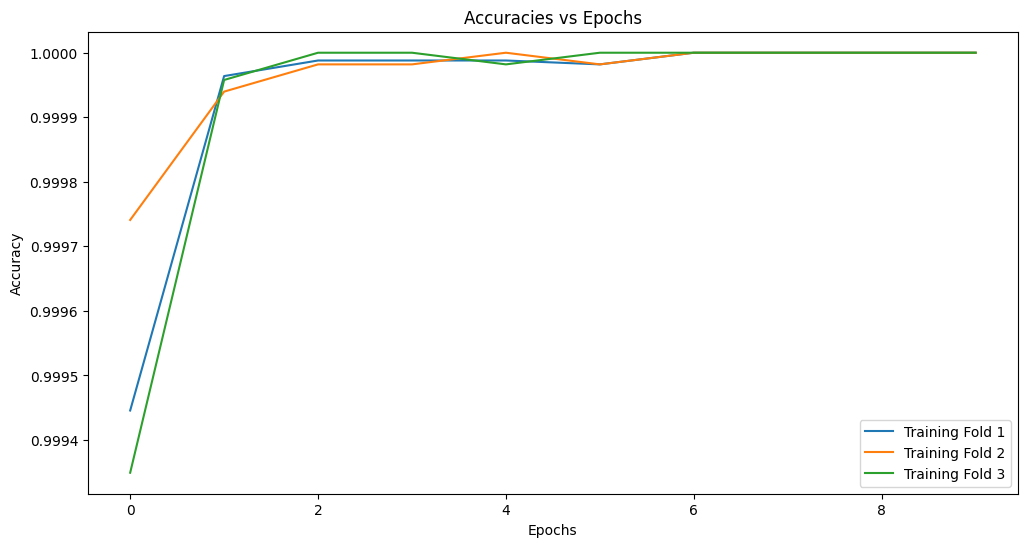


Classification Report - Fold 1:

              precision    recall  f1-score   support

          12       1.00      1.00      1.00       145
          13       1.00      1.00      1.00     78493
           0       1.00      1.00      1.00      4349

    accuracy                           1.00     82987
   macro avg       1.00      1.00      1.00     82987
weighted avg       1.00      1.00      1.00     82987

Confusion Matrix:
 [[  144     0     0]
 [    0 78493     0]
 [    0     0  4350]]

Classification Report - Fold 2:

              precision    recall  f1-score   support

          12       1.00      1.00      1.00       145
          13       1.00      1.00      1.00     78493
           0       1.00      1.00      1.00      4349

    accuracy                           1.00     82987
   macro avg       1.00      1.00      1.00     82987
weighted avg       1.00      1.00      1.00     82987

Confusion Matrix:
 [[  145     0     0]
 [    0 78493     0]
 [    0     0  4349]]

Cla

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with a column 'Label'
# ... (your data loading and preprocessing code)


# Filter the dataframe to include only selected labels
filtered_df = df[df['Label'].isin(selected_labels)]

# Separate features and labels
X = filtered_df.drop('Label', axis=1)  # Assuming 'Label' is the target column
y = filtered_df['Label']

# Convert labels to integers using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Number of folds for cross-validation
n_splits = 3

# Initialize StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store model history and confusion matrices for each fold
model_history = []
conf_matrices = []

# Iterate through the folds
for i, (train_index, test_index) in enumerate(stratified_kfold.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Reshape data for CNN input
    X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
    X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

    # Build the CNN model
    model = models.Sequential()
    model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(len(selected_labels), activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    print("Training on Fold:", i+1)

    # Train the model
    history = model.fit(X_train_reshaped, y_train, epochs=10, validation_data=(X_test_reshaped, y_test), batch_size=32)

    # Evaluate the model on the test set
    y_pred_probs = model.predict(X_test_reshaped)
    y_pred = tf.argmax(y_pred_probs, axis=1)

    # Print confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)
    conf_matrices.append(conf_matrix)

    # Store the model history
    model_history.append(history)

# Plot accuracies versus epochs for each fold
plt.figure(figsize=(12, 6))
plt.title('Accuracies vs Epochs')
for i, history in enumerate(model_history):
    plt.plot(history.history['accuracy'], label=f'Training Fold {i+1}')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Print classification reports
for i, (history, conf_matrix) in enumerate(zip(model_history, conf_matrices)):
    print(f"\nClassification Report - Fold {i+1}:\n")

    # Print classification report
    y_true = label_encoder.inverse_transform(y_test)
    y_pred_labels = label_encoder.inverse_transform(y_pred.numpy())

    # Convert selected_labels to strings
    selected_labels_str = [str(label) for label in selected_labels]

    print(classification_report(y_true, y_pred_labels, target_names=selected_labels_str))

    # Optionally, you can print the confusion matrix
    print("Confusion Matrix:\n", conf_matrix)

**Main CNN**

Training on Fold: 1
Epoch 1/10
5187/5187 [==============================] - 11s 2ms/step - loss: 0.0124 - accuracy: 0.9970 - val_loss: 2.2997e-06 - val_accuracy: 1.0000
Epoch 2/10
5187/5187 [==============================] - 12s 2ms/step - loss: 4.4032e-04 - accuracy: 0.9998 - val_loss: 4.5068e-08 - val_accuracy: 1.0000
Epoch 3/10
5187/5187 [==============================] - 12s 2ms/step - loss: 3.4571e-04 - accuracy: 0.9999 - val_loss: 1.1942e-08 - val_accuracy: 1.0000
Epoch 4/10
5187/5187 [==============================] - 12s 2ms/step - loss: 2.6947e-04 - accuracy: 0.9999 - val_loss: 9.9875e-05 - val_accuracy: 1.0000
Epoch 5/10
5187/5187 [==============================] - 12s 2ms/step - loss: 3.8811e-04 - accuracy: 0.9999 - val_loss: 1.2721e-06 - val_accuracy: 1.0000
Epoch 6/10
5187/5187 [==============================] - 12s 2ms/step - loss: 1.4874e-04 - accuracy: 0.9999 - val_loss: 6.1769e-11 - val_accuracy: 1.0000
Epoch 7/10
5187/5187 [==============================] - 12s 2ms/st

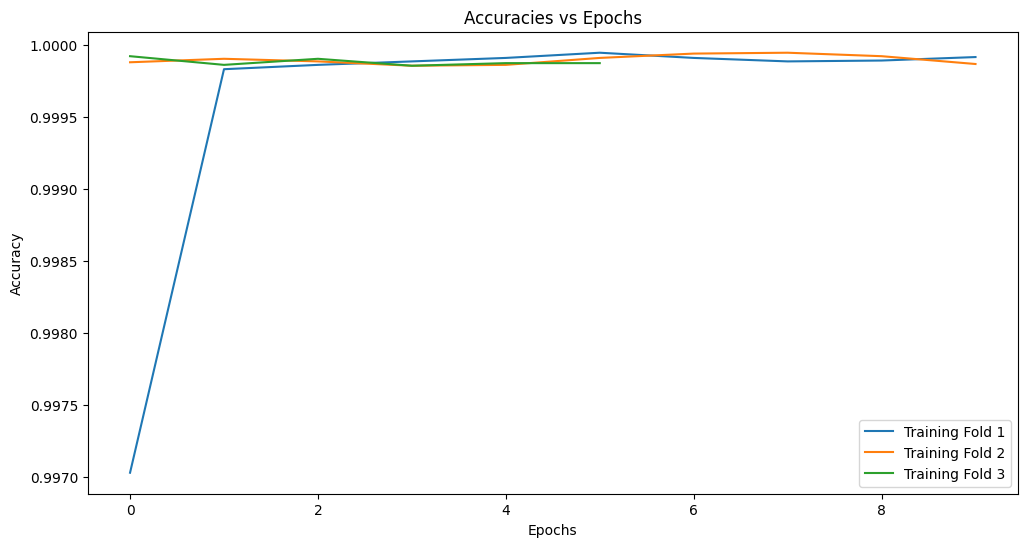

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with a column 'Label'
# ... (your data loading and preprocessing code)

# Filter the dataframe to include only selected labels
filtered_df = df[df['Label'].isin(selected_labels)]

# Separate features and labels
X = filtered_df.drop('Label', axis=1)  # Assuming 'Label' is the target column
y = filtered_df['Label']

# Convert labels to integers using LabelEncoder starting from 0
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Number of folds for cross-validation
n_splits = 3

# Initialize StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store model history and confusion matrices for each fold
model_history = []
conf_matrices = []

# Compile the model outside the loop
output_units = len(np.unique(y))
model = models.Sequential()
model.add(layers.Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)))
model.add(layers.Conv1D(filters=16, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(output_units, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Iterate through the folds
for i, (train_index, test_index) in enumerate(stratified_kfold.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Reshape data for CNN input
    X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
    X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

    print("Training on Fold:", i+1)

    # Add Early Stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model with additional adjustments
    history = model.fit(X_train_reshaped, y_train, epochs=10, validation_data=(X_test_reshaped, y_test), batch_size=32, callbacks=[early_stopping])

    # Evaluate the model on the test set
    y_pred_probs = model.predict(X_test_reshaped)
    y_pred = tf.argmax(y_pred_probs, axis=1)

    # Print confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)
    conf_matrices.append(conf_matrix)

    # Store the model history
    model_history.append(history)

# Plot accuracies versus epochs for each fold
plt.figure(figsize=(12, 6))
plt.title('Accuracies vs Epochs')
for i, history in enumerate(model_history):
    plt.plot(history.history['accuracy'], label=f'Training Fold {i+1}')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



**CustomEarlyStopping**

The purpose and functionality of the CustomEarlyStopping callback in five points:

Custom Stopping Condition:

1. The primary purpose of this callback is to provide a custom stopping condition during the training of a neural network. The stopping condition is based on the validation accuracy (val_accuracy) reaching or exceeding a specified threshold (threshold).
Threshold for Early Stopping:

2. The threshold parameter allows you to set a specific value for the validation accuracy. If, during training, the validation accuracy surpasses or equals this threshold, the training will be stopped to prevent overfitting.
Patience for Tolerance:

3. The patience parameter determines how many consecutive epochs the validation accuracy is allowed to exceed the threshold before stopping. If the threshold is reached but the accuracy doesn't consistently stay above it for the specified number of epochs, training continues.
Restoring Best Weights:

4. If restore_best_weights is set to True, the callback will restore the model's weights to those that produced the best validation accuracy. This is useful to prevent overfitting while still obtaining the best-performing model.
Logging and Information:

5. The on_epoch_end method is triggered at the end of each epoch. It checks whether the current validation accuracy meets the specified threshold. If the condition is met, it prints a message indicating that the training is stopped early and optionally restores the best weights. This logging provides insight into the training progress and the reason for early stopping.

In summary, the CustomEarlyStopping callback is a flexible tool to control the training process based on a custom criterion. It enhances the standard early stopping by allowing you to specify a threshold for a specific metric (validation accuracy, in this case) and provides additional options such as patience and the ability to restore the best weights for improved model generalization.








Training on Fold: 1
Epoch 1/10
4150/4150 [==============================] - 20s 4ms/step - loss: 0.1814 - accuracy: 0.9404 - val_loss: 0.4891 - val_accuracy: 0.9913
Epoch 2/10
4150/4150 [==============================] - 14s 3ms/step - loss: 0.0154 - accuracy: 0.9972 - val_loss: 0.8298 - val_accuracy: 0.9911
Epoch 3/10
4150/4150 [==============================] - 15s 3ms/step - loss: 0.0072 - accuracy: 0.9976 - val_loss: 1.0705 - val_accuracy: 0.9913
Epoch 4/10
4150/4150 [==============================] - 13s 3ms/step - loss: 0.0052 - accuracy: 0.9978 - val_loss: 1.2166 - val_accuracy: 0.9913
Epoch 5/10
4150/4150 [==============================] - 13s 3ms/step - loss: 0.0048 - accuracy: 0.9979 - val_loss: 1.3496 - val_accuracy: 0.9913
Epoch 6/10
4150/4150 [==============================] - 12s 3ms/step - loss: 0.0044 - accuracy: 0.9979 - val_loss: 1.5109 - val_accuracy: 0.9913
Epoch 7/10
4150/4150 [==============================] - 12s 3ms/step - loss: 0.0043 - accuracy: 0.9979 - val_l

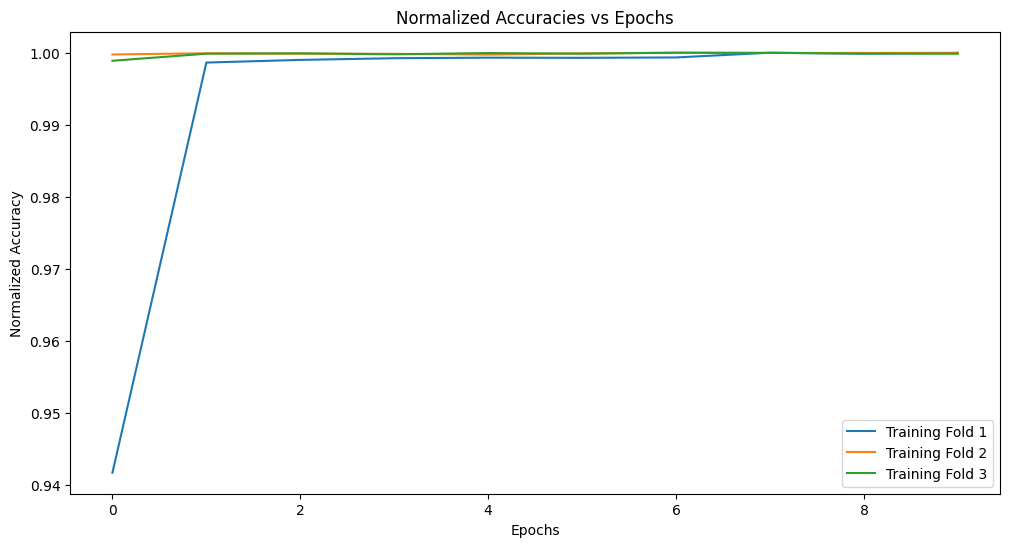

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt

class CustomEarlyStopping(Callback):
    def __init__(self, monitor='val_accuracy', threshold=0.9998, patience=10, restore_best_weights=True):
        super(CustomEarlyStopping, self).__init__()
        self.monitor = monitor
        self.threshold = threshold
        self.patience = patience
        self.restore_best_weights = restore_best_weights
        self.best_epoch = 0

    def on_epoch_end(self, epoch, logs=None):
        current_value = logs.get(self.monitor)
        if current_value is not None and current_value >= self.threshold:
            self.model.stop_training = True
            self.best_epoch = epoch
            if self.restore_best_weights:
                self.model.set_weights(self.model.stop_training_best_weights)
                print(f"\nCustomEarlyStopping: Stopped training at epoch {epoch + 1}, {self.monitor} reached {current_value:.4f}")
                print("Restoring best weights.")
            else:
                print(f"\nCustomEarlyStopping: Stopped training at epoch {epoch + 1}, {self.monitor} reached {current_value:.4f}")
        elif self.monitor not in logs:
            print(f"\nCustomEarlyStopping: Warning - {self.monitor} not found in logs. Stopping training.")
            self.model.stop_training = True

# Assuming df is your DataFrame
filtered_df = df[df['Label'].isin(selected_labels)]  # Uncomment this line if needed

# Separate features and labels
X = filtered_df.drop('Label', axis=1)  # Assuming 'Label' is the target column
y = filtered_df['Label']  # Uncomment these lines if needed

# Convert labels to integers using LabelEncoder starting from 0
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Uncomment this line if needed

# Number of folds for cross-validation
n_splits = 3

# Initialize StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store model history and confusion matrices for each fold
model_history = []
conf_matrices = []

# Compile the model outside the loop
output_units = len(np.unique(y))
model = models.Sequential()
model.add(layers.Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)))
model.add(layers.BatchNormalization())
model.add(layers.Conv1D(filters=16, kernel_size=3, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.7))  # Increased dropout rate
model.add(layers.Dense(output_units, activation='softmax'))

# Compile the model with learning rate scheduling
initial_learning_rate = 0.0001  # Adjust the initial learning rate
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Iterate through the folds
for i, (train_index, test_index) in enumerate(stratified_kfold.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Reshape data for CNN input
    X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
    X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

    print("Training on Fold:", i+1)

    # Add Custom Early Stopping callback
    custom_early_stopping = CustomEarlyStopping(monitor='val_accuracy', threshold=0.9998, patience=10, restore_best_weights=True)

    # Train the model with additional adjustments
    history = model.fit(X_train_reshaped, y_train, epochs=10, validation_split=0.2, batch_size=32, callbacks=[custom_early_stopping])

    # Evaluate the model on the test set
    y_pred_probs = model.predict(X_test_reshaped)
    y_pred = tf.argmax(y_pred_probs, axis=1)

    # Convert encoded labels back to original labels
    y_test_original = label_encoder.inverse_transform(y_test)
    y_pred_original = label_encoder.inverse_transform(y_pred.numpy())



    # Store the model history
    model_history.append(history)

# Plot normalized accuracies versus epochs for each fold
plt.figure(figsize=(12, 6))
plt.title('Normalized Accuracies vs Epochs')
for i, history in enumerate(model_history):
    normalized_accuracy = np.array(history.history['accuracy']) / np.max(history.history['accuracy'])
    plt.plot(normalized_accuracy, label=f'Training Fold {i+1}')

plt.xlabel('Epochs')
plt.ylabel('Normalized Accuracy')
plt.legend()
plt.show()


**12.01.2024 CNN**

Training on Fold: 1
Epoch 1/10
3112/3112 [==============================] - 19s 4ms/step - loss: 0.1566 - accuracy: 0.9373 - val_loss: 0.0706 - val_accuracy: 0.9913
Epoch 2/10
3112/3112 [==============================] - 8s 3ms/step - loss: 0.0220 - accuracy: 0.9886 - val_loss: 0.1122 - val_accuracy: 0.9913
Epoch 3/10
3112/3112 [==============================] - 10s 3ms/step - loss: 0.0100 - accuracy: 0.9982 - val_loss: 0.1761 - val_accuracy: 0.9913
Epoch 4/10
3112/3112 [==============================] - 10s 3ms/step - loss: 0.0066 - accuracy: 0.9988 - val_loss: 0.2121 - val_accuracy: 0.9913
Epoch 5/10
3112/3112 [==============================] - 9s 3ms/step - loss: 0.0051 - accuracy: 0.9991 - val_loss: 0.2558 - val_accuracy: 0.9913
Epoch 6/10
3112/3112 [==============================] - 10s 3ms/step - loss: 0.0044 - accuracy: 0.9993 - val_loss: 0.2580 - val_accuracy: 0.9913
Epoch 7/10
3112/3112 [==============================] - 8s 3ms/step - loss: 0.0039 - accuracy: 0.9994 - val_loss

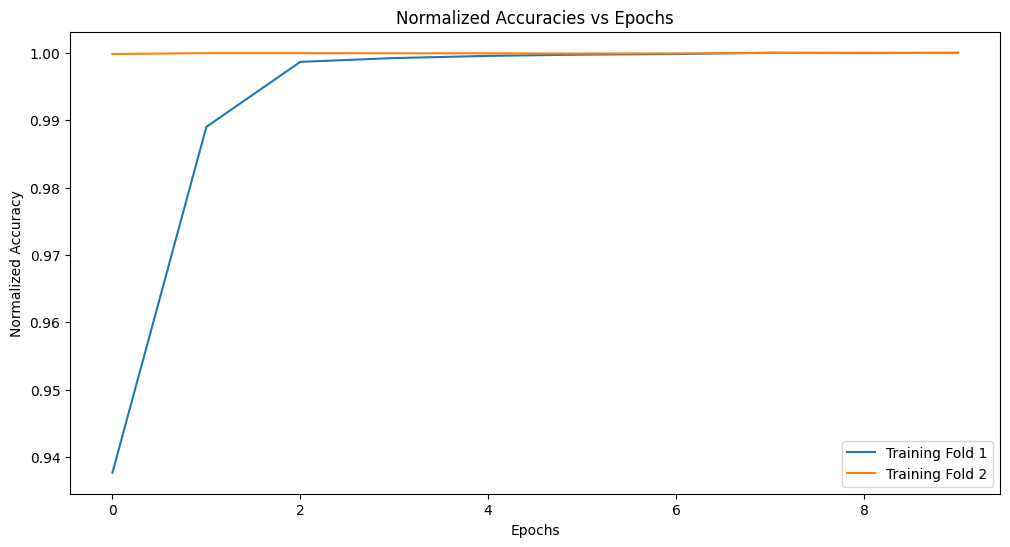

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt

class CustomEarlyStopping(Callback):
    def __init__(self, monitor='val_accuracy', threshold=0.9998, patience=10, restore_best_weights=True):
        super(CustomEarlyStopping, self).__init__()
        self.monitor = monitor
        self.threshold = threshold
        self.patience = patience
        self.restore_best_weights = restore_best_weights
        self.best_epoch = 0

    def on_epoch_end(self, epoch, logs=None):
        current_value = logs.get(self.monitor)
        if current_value is not None and current_value >= self.threshold:
            self.model.stop_training = True
            self.best_epoch = epoch
            if self.restore_best_weights:
                self.model.set_weights(self.model.stop_training_best_weights)
                print(f"\nCustomEarlyStopping: Stopped training at epoch {epoch + 1}, {self.monitor} reached {current_value:.4f}")
                print("Restoring best weights.")
            else:
                print(f"\nCustomEarlyStopping: Stopped training at epoch {epoch + 1}, {self.monitor} reached {current_value:.4f}")
        elif self.monitor not in logs:
            print(f"\nCustomEarlyStopping: Warning - {self.monitor} not found in logs. Stopping training.")
            self.model.stop_training = True

# Assuming df is your DataFrame
filtered_df = df[df['Label'].isin(selected_labels)]  # Uncomment this line if needed

# Separate features and labels
X = filtered_df.drop('Label', axis=1)  # Assuming 'Label' is the target column
y = filtered_df['Label']  # Uncomment these lines if needed

# Convert labels to integers using LabelEncoder starting from 0
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Uncomment this line if needed

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply normalization
X_norm = preprocessing.normalize(X_scaled)

# Number of folds for cross-validation
n_splits = 2

# Initialize StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store model history and confusion matrices for each fold
model_history = []
conf_matrices = []

# Compile the CNN model outside the loop
output_units = len(np.unique(y))
model = models.Sequential()
model.add(layers.Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(X_norm.shape[1], 1)))
model.add(layers.BatchNormalization())
model.add(layers.Conv1D(filters=16, kernel_size=3, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.7))  # Increased dropout rate
model.add(layers.Dense(output_units, activation='softmax'))

# Compile the model with learning rate scheduling
initial_learning_rate = 0.0001  # Adjust the initial learning rate
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Iterate through the folds
for i, (train_index, test_index) in enumerate(stratified_kfold.split(X_norm, y)):
    X_train, X_test = X_norm[train_index], X_norm[test_index]
    y_train, y_test = y[train_index], y[test_index]

    print("Training on Fold:", i+1)

    # Add Custom Early Stopping callback
    custom_early_stopping = CustomEarlyStopping(monitor='val_accuracy', threshold=0.9998, patience=10, restore_best_weights=True)

    # Train the model with additional adjustments
    history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32, callbacks=[custom_early_stopping])

    # Evaluate the model on the test set
    y_pred_probs = model.predict(X_test)
    y_pred = tf.argmax(y_pred_probs, axis=1)

    # Convert encoded labels back to original labels
    y_test_original = label_encoder.inverse_transform(y_test)
    y_pred_original = label_encoder.inverse_transform(y_pred.numpy())

    # Store the model history
    model_history.append(history)

# Plot normalized accuracies versus epochs for each fold
plt.figure(figsize=(12, 6))
plt.title('Normalized Accuracies vs Epochs')
for i, history in enumerate(model_history):
    normalized_accuracy = np.array(history.history['accuracy']) / np.max(history.history['accuracy'])
    plt.plot(normalized_accuracy, label=f'Training Fold {i+1}')

plt.xlabel('Epochs')
plt.ylabel('Normalized Accuracy')
plt.legend()
plt.show()


**Sequential model**

Training on Fold: 1
Epoch 1/10
3112/3112 [==============================] - 27s 7ms/step - loss: 0.4950 - accuracy: 0.8140 - val_loss: 0.0579 - val_accuracy: 0.9906
Epoch 2/10
3112/3112 [==============================] - 10s 3ms/step - loss: 0.0368 - accuracy: 0.9930 - val_loss: 0.0800 - val_accuracy: 0.9908
Epoch 3/10
3112/3112 [==============================] - 8s 3ms/step - loss: 0.0127 - accuracy: 0.9970 - val_loss: 0.1041 - val_accuracy: 0.9911
Epoch 4/10
3112/3112 [==============================] - 10s 3ms/step - loss: 0.0067 - accuracy: 0.9983 - val_loss: 0.1230 - val_accuracy: 0.9912
Epoch 5/10
3112/3112 [==============================] - 8s 3ms/step - loss: 0.0038 - accuracy: 0.9989 - val_loss: 0.1315 - val_accuracy: 0.9912
Epoch 6/10
3112/3112 [==============================] - 10s 3ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.1419 - val_accuracy: 0.9912
Epoch 7/10
3112/3112 [==============================] - 8s 2ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss

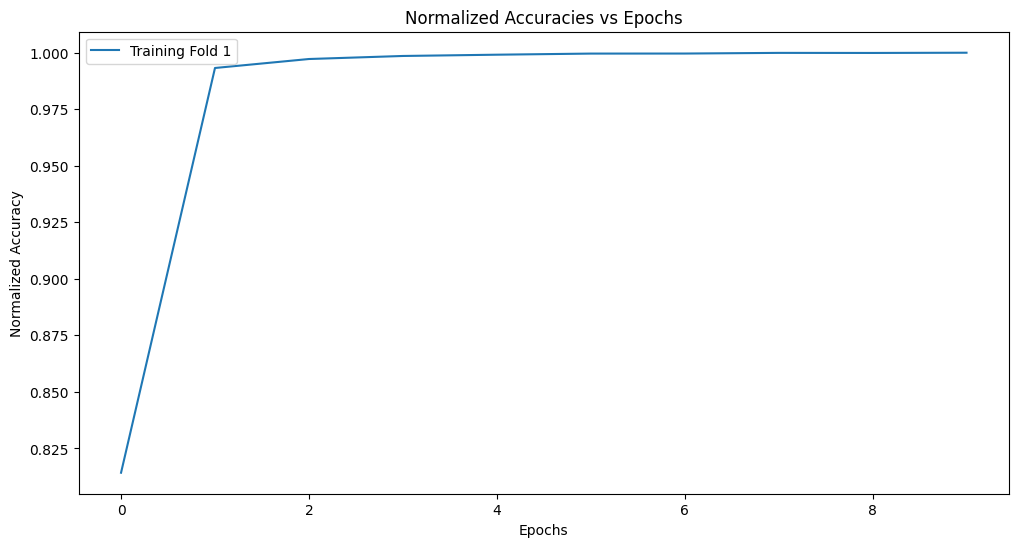

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt

class CustomEarlyStopping(Callback):
    def __init__(self, monitor='val_accuracy', threshold=0.9998, patience=10, restore_best_weights=True):
        super(CustomEarlyStopping, self).__init__()
        self.monitor = monitor
        self.threshold = threshold
        self.patience = patience
        self.restore_best_weights = restore_best_weights
        self.best_epoch = 0

    def on_epoch_end(self, epoch, logs=None):
        current_value = logs.get(self.monitor)
        if current_value is not None and current_value >= self.threshold:
            self.model.stop_training = True
            self.best_epoch = epoch
            if self.restore_best_weights:
                self.model.set_weights(self.model.stop_training_best_weights)
                print(f"\nCustomEarlyStopping: Stopped training at epoch {epoch + 1}, {self.monitor} reached {current_value:.4f}")
                print("Restoring best weights.")
            else:
                print(f"\nCustomEarlyStopping: Stopped training at epoch {epoch + 1}, {self.monitor} reached {current_value:.4f}")
        elif self.monitor not in logs:
            print(f"\nCustomEarlyStopping: Warning - {self.monitor} not found in logs. Stopping training.")
            self.model.stop_training = True

# Assuming df is your DataFrame
filtered_df = df[df['Label'].isin(selected_labels)]  # Uncomment this line if needed

# Separate features and labels
X = filtered_df.drop('Label', axis=1)  # Assuming 'Label' is the target column
y = filtered_df['Label']  # Uncomment these lines if needed

# Convert labels to integers using LabelEncoder starting from 0
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Uncomment this line if needed

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply normalization
X_norm = preprocessing.normalize(X_scaled)

# Number of folds for cross-validation
n_splits = 2  # Set to 1 for only one fold

# Initialize StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store model history and confusion matrices for each fold
model_history = []
conf_matrices = []

# Compile the Sequential model outside the loop
output_units = len(np.unique(y))
Input_ = tf.keras.Input(shape=(X_norm.shape[1],))
model1 = tf.keras.layers.Dense(32, activation=tf.nn.relu)(Input_)
model1 = tf.keras.layers.Dropout(0.4)(model1)
model1 = tf.keras.layers.BatchNormalization()(model1)

model1 = tf.keras.layers.Dense(64, activation=tf.nn.relu)(model1)
model1 = tf.keras.layers.Dropout(0.4)(model1)
model1 = tf.keras.layers.BatchNormalization()(model1)

output = tf.keras.layers.Dense(output_units, activation=tf.nn.softmax)(model1)

model1 = models.Model(Input_, output)

# Compile the model with learning rate scheduling
initial_learning_rate = 0.0001  # Adjust the initial learning rate
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Iterate through the folds
for i, (train_index, test_index) in enumerate(stratified_kfold.split(X_norm, y)):
    X_train, X_test = X_norm[train_index], X_norm[test_index]
    y_train, y_test = y[train_index], y[test_index]

    print("Training on Fold:", i+1)

    # Add Custom Early Stopping callback
    custom_early_stopping = CustomEarlyStopping(monitor='val_accuracy', threshold=0.9998, patience=10, restore_best_weights=True)

    # Train the model with additional adjustments
    history = model1.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32, callbacks=[custom_early_stopping])

    # Evaluate the model on the test set
    y_pred_probs = model1.predict(X_test)
    y_pred = tf.argmax(y_pred_probs, axis=1)

    # Convert encoded labels back to original labels
    y_test_original = label_encoder.inverse_transform(y_test)
    y_pred_original = label_encoder.inverse_transform(y_pred.numpy())

    # Store the model history
    model_history.append(history)

    # Print metrics and confusion matrix for the first fold
    print(f"Metrics for Fold {i+1} - Accuracy: {history.history['accuracy'][-1]:.4f}, Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
    print(f"Confusion Matrix for Fold {i+1}:\n{confusion_matrix(y_test_original, y_pred_original)}")

    # Break out of the loop after the first fold
    break

# Plot normalized accuracies versus epochs for each fold
plt.figure(figsize=(12, 6))
plt.title('Normalized Accuracies vs Epochs')
for i, history in enumerate(model_history):
    normalized_accuracy = np.array(history.history['accuracy']) / np.max(history.history['accuracy'])
    plt.plot(normalized_accuracy, label=f'Training Fold {i+1}')

plt.xlabel('Epochs')
plt.ylabel('Normalized Accuracy')
plt.legend()
plt.show()


Training on Fold: 1
Epoch 1/10
3112/3112 [==============================] - 12s 3ms/step - loss: 0.4712 - accuracy: 0.8252 - val_loss: 0.0725 - val_accuracy: 0.9911
Epoch 2/10
3112/3112 [==============================] - 9s 3ms/step - loss: 0.0309 - accuracy: 0.9950 - val_loss: 0.0938 - val_accuracy: 0.9912
Epoch 3/10
3112/3112 [==============================] - 7s 2ms/step - loss: 0.0101 - accuracy: 0.9978 - val_loss: 0.1216 - val_accuracy: 0.9912
Epoch 4/10
3112/3112 [==============================] - 9s 3ms/step - loss: 0.0056 - accuracy: 0.9985 - val_loss: 0.1453 - val_accuracy: 0.9912
Epoch 5/10
3112/3112 [==============================] - 7s 2ms/step - loss: 0.0035 - accuracy: 0.9990 - val_loss: 0.1671 - val_accuracy: 0.9913
Epoch 6/10
3112/3112 [==============================] - 9s 3ms/step - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.1905 - val_accuracy: 0.9913
Epoch 7/10
3112/3112 [==============================] - 9s 3ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0

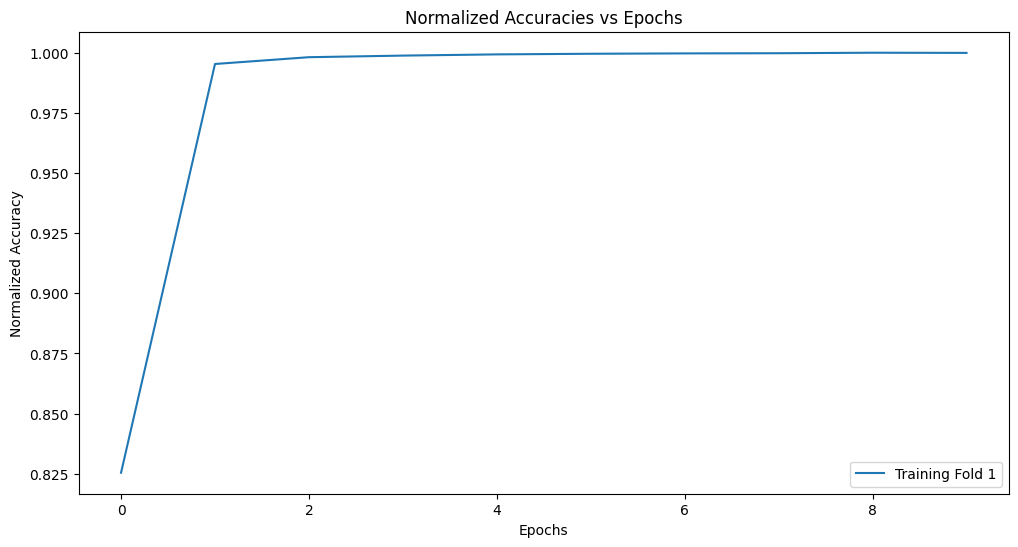

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt

class CustomEarlyStopping(Callback):
    def __init__(self, monitor='val_accuracy', threshold=1.0000, patience=10, restore_best_weights=True):
        super(CustomEarlyStopping, self).__init__()
        self.monitor = monitor
        self.threshold = threshold
        self.patience = patience
        self.restore_best_weights = restore_best_weights
        self.best_epoch = 0

    def on_epoch_end(self, epoch, logs=None):
        current_value = logs.get(self.monitor)
        if current_value is not None and current_value >= self.threshold:
            self.model.stop_training = True
            self.best_epoch = epoch
            if self.restore_best_weights:
                self.model.set_weights(self.model.stop_training_best_weights)
                print(f"\nCustomEarlyStopping: Stopped training at epoch {epoch + 1}, {self.monitor} reached {current_value:.4f}")
                print("Restoring best weights.")
            else:
                print(f"\nCustomEarlyStopping: Stopped training at epoch {epoch + 1}, {self.monitor} reached {current_value:.4f}")
        elif self.monitor not in logs:
            print(f"\nCustomEarlyStopping: Warning - {self.monitor} not found in logs. Stopping training.")
            self.model.stop_training = True

# Assuming df is your DataFrame
filtered_df = df[df['Label'].isin(selected_labels)]  # Uncomment this line if needed

# Separate features and labels
X = filtered_df.drop('Label', axis=1)  # Assuming 'Label' is the target column
y = filtered_df['Label']  # Uncomment these lines if needed

# Convert labels to integers using LabelEncoder starting from 0
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Uncomment this line if needed

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply normalization
X_norm = preprocessing.normalize(X_scaled)

# Number of folds for cross-validation
n_splits = 2  # Set to 1 for only one fold

# Initialize StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store model history and confusion matrices for each fold
model_history = []
conf_matrices = []

# Compile the Sequential model outside the loop
output_units = len(np.unique(y))
Input_ = tf.keras.Input(shape=(X_norm.shape[1],))
model1 = tf.keras.layers.Dense(32, activation=tf.nn.relu)(Input_)
model1 = tf.keras.layers.Dropout(0.4)(model1)
model1 = tf.keras.layers.BatchNormalization()(model1)

model1 = tf.keras.layers.Dense(64, activation=tf.nn.relu)(model1)
model1 = tf.keras.layers.Dropout(0.4)(model1)
model1 = tf.keras.layers.BatchNormalization()(model1)

output = tf.keras.layers.Dense(output_units, activation=tf.nn.softmax)(model1)

model1 = models.Model(Input_, output)

# Compile the model with learning rate scheduling
initial_learning_rate = 0.0001  # Adjust the initial learning rate
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Iterate through the folds
for i, (train_index, test_index) in enumerate(stratified_kfold.split(X_norm, y)):
    X_train, X_test = X_norm[train_index], X_norm[test_index]
    y_train, y_test = y[train_index], y[test_index]

    print("Training on Fold:", i+1)

    # Add Custom Early Stopping callback
    custom_early_stopping = CustomEarlyStopping(monitor='val_accuracy', threshold=1.0000, patience=10, restore_best_weights=True)

    # Train the model with additional adjustments
    history = model1.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32, callbacks=[custom_early_stopping])

    # Evaluate the model on the test set
    y_pred_probs = model1.predict(X_test)
    y_pred = tf.argmax(y_pred_probs, axis=1)

    # Convert encoded labels back to original labels
    y_test_original = label_encoder.inverse_transform(y_test)
    y_pred_original = label_encoder.inverse_transform(y_pred.numpy())

    # Store the model history
    model_history.append(history)

    # Print metrics and confusion matrix for the first fold
    print(f"Metrics for Fold {i+1} - Accuracy: {history.history['accuracy'][-1]:.4f}, Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
    print(f"Confusion Matrix for Fold {i+1}:\n{confusion_matrix(y_test_original, y_pred_original)}")

    # Break out of the loop after the first fold
    break

# Plot normalized accuracies versus epochs for each fold
plt.figure(figsize=(12, 6))
plt.title('Normalized Accuracies vs Epochs')
for i, history in enumerate(model_history):
    normalized_accuracy = np.array(history.history['accuracy']) / np.max(history.history['accuracy'])
    plt.plot(normalized_accuracy, label=f'Training Fold {i+1}')

plt.xlabel('Epochs')
plt.ylabel('Normalized Accuracy')
plt.legend()
plt.show()


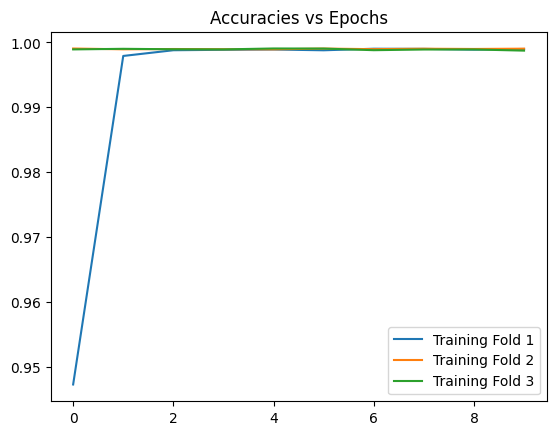

In [ ]:
plt.title('Accuracies vs Epochs')
plt.plot(model_history[0].history['accuracy'], label='Training Fold 1')
plt.plot(model_history[1].history['accuracy'], label='Training Fold 2')
plt.plot(model_history[2].history['accuracy'], label='Training Fold 3')
plt.legend()
plt.savefig('/content/drive/MyDrive/Dataset/kfold_accurcy.png')
plt.show()

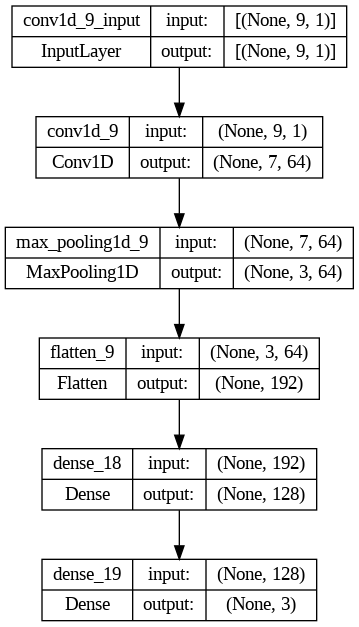

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
print(X_train.shape[0])
print(X_train.shape[1])
print(y_train.shape[0])

165974
9
165974


In [ ]:
#evaluting the model
print(X_train.shape)
print(X_train.shape)
model.evaluate(X_test,y_test)

(165974, 9)
(165974, 9)
2594/2594 [==============================] - 3s 1ms/step - loss: 9479.0244 - accuracy: 0.9458


[9479.0244140625, 0.9458469152450562]

**END OF CNN**

In [ ]:
from sklearn import preprocessing

scale = preprocessing.StandardScaler()
X1 = scale.fit_transform(X)
X_norm = preprocessing.normalize(X1)

In [ ]:
!pip install keras-utils

  Preparing metadata (setup.py) ... done
  Created wheel for keras-utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2631 sha256=a85b2be4ff0d2bf787d717b58b0077efe69d363889913620b25808582f3b1b4c
  Stored in directory: /root/.cache/pip/wheels/5c/c0/b3/0c332de4fd71f3733ea6d61697464b7ae4b2b5ff0300e6ca7a
Successfully built keras-utils


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

Input_ = tf.keras.Input(shape=(12,))
model1 = tf.keras.layers.Dense(32, activation=tf.nn.relu)(Input_)
model1 = tf.keras.layers.Dropout(0.4)(model1)
model1 = tf.keras.layers.BatchNormalization()(model1)

model1 = tf.keras.layers.Dense(64, activation=tf.nn.relu)(model1)
model1 = tf.keras.layers.Dropout(0.4)(model1)
model1 = tf.keras.layers.BatchNormalization()(model1)


output = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(model1)

model1 = keras.Model(Input_, output)
model1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense_23 (Dense)            (None, 32)                416       
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 batch_normalization_2 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dense_24 (Dense)            (None, 64)                2112      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                           

In [ ]:
from tensorflow.keras import optimizers

#opt = optimizers.SGD(learning_rate = 0.0001)
#model1.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
METRICS = [keras.metrics.AUC(name='auc')]
model1.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=METRICS)

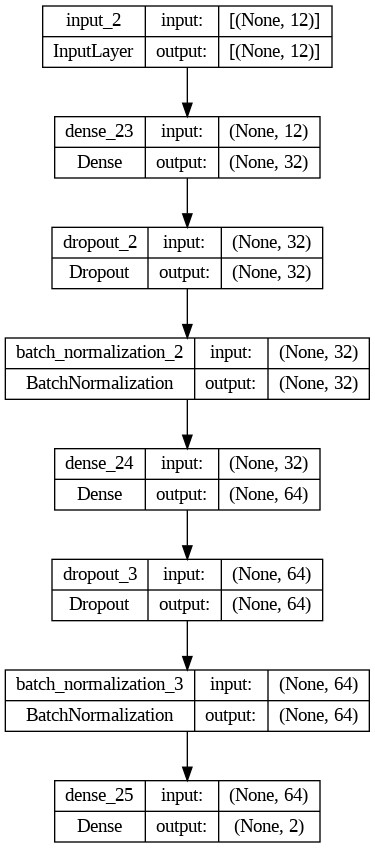

In [ ]:
from keras.utils import plot_model
plot_model(model1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


**role of attribute in classification- which feature has more role in classification using RandomForestClassifier**

            Feature  Importance
7               ACK    0.272927
4       Source_Port    0.208801
8               RST    0.186689
5  Destination_Port    0.158535
6               SYN    0.154566
2         Source_ip    0.010468
1              Time    0.005051
3    Destination_IP    0.002092
0        Unnamed: 0    0.000871


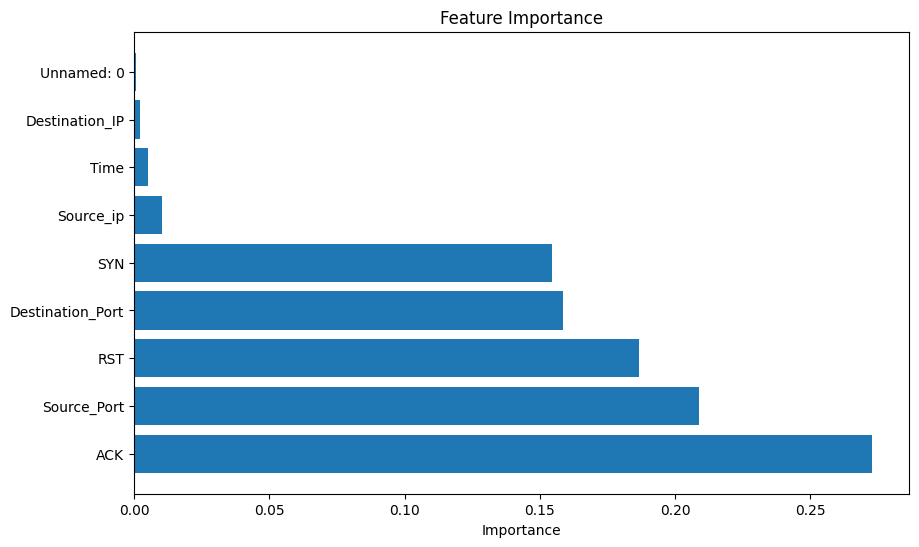

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


            Feature  Importance
7               ACK    0.272927
4       Source_Port    0.208801
8               RST    0.186689
5  Destination_Port    0.158535
6               SYN    0.154566
2         Source_ip    0.010468
1              Time    0.005051
3    Destination_IP    0.002092
0        Unnamed: 0    0.000871


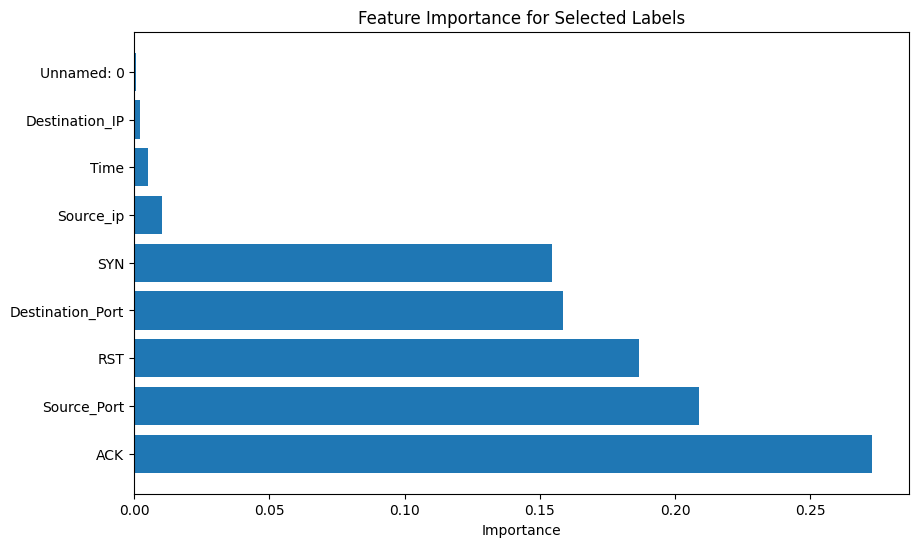

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

selected_data = df[df['Label'].isin(selected_labels)]

# Split the selected data into features (X) and labels (y)
X_selected = selected_data.drop('Label', axis=1)
y_selected = selected_data['Label']

# Split the data into training and testing sets
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    X_selected, y_selected, test_size=0.2, random_state=42
)

# Create a Random Forest classifier
rf_classifier_selected = RandomForestClassifier(random_state=42)

# Train the classifier on the selected data
rf_classifier_selected.fit(X_train_selected, y_train_selected)

# Get feature importances
feature_importances_selected = rf_classifier_selected.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df_selected = pd.DataFrame({'Feature': X_selected.columns, 'Importance': feature_importances_selected})

# Sort the features by importance in descending order
feature_importance_df_selected = feature_importance_df_selected.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance_df_selected)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_selected['Feature'], feature_importance_df_selected['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance for Selected Labels')
plt.show()
